In [1]:
import itertools
import qiskit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import *
from qiskit import BasicAer, IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.compiler import transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info.analysis import *
from qiskit.tools.visualization import circuit_drawer, plot_bloch_multivector

pi = np.pi

In [67]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 99999

In [3]:
#IBMQ.load_accounts()

In [4]:
node = QuantumRegister(5)
aux = QuantumRegister(1)
creq = ClassicalRegister(5)
circ = QuantumCircuit(node,aux,creq)

In [5]:
#node1 = QuantumRegister(5)
#aux1 = QuantumRegister(1)
#circ1 = QuantumCircuit(node1,aux1)

In [6]:
def uz(circ, node, aux, graph, a):      # theta takes value in [0, pi]
    step_len = 1/100
    for[i,j] in graph:
         circ.cx(node[i],node[j])
         circ.rz(-4*step_len*pi*a,node[j])
         circ.cx(node[i],node[j])
         circ.rz(4*step_len*pi*a,aux)
         circ.barrier()

In [7]:
#uz(circ1,node1,aux1,graph,pi/4)
#circ1.draw(output='mpl')

In [8]:
def ux(circ,node,b):       # theta takes value in [0, pi]
    step_len = 1/100
    circ.rx(4*step_len*pi*b, node)
    circ.barrier()

In [9]:
def maxcut(circ, node, aux, creq,graph, ang_zip):
    for a,b in ang_zip:
        uz(circ, node, aux, graph, a)
        ux(circ, node, b)
    circ.measure(node, creq)

In [10]:
def mean(graph,answer):
    sum2 = 0
    for k,v in answer.items():
        sum1 = 0
        for [i,j] in graph:
            if k[i] != k[j]:
                sum1 += 1
        sum2 += sum1*v
    mean = sum2/shots
    return(mean)

In [11]:
def outcome(n,graph,ang1,ang2):
    ang_zip = zip(ang1,ang2)
    node = QuantumRegister(n)
    aux = QuantumRegister(1)
    creq = ClassicalRegister(n)
    circ = QuantumCircuit(node,aux,creq)
    circ.h(node)
    maxcut(circ, node, aux, creq,graph, ang_zip)
    results = execute(circ, backend = backend, shots = shots).result()
    answer = results.get_counts()
    out = mean(graph,answer)
    return(out)

In [93]:
#go through 
r = 100
p = 2
ang_list = []
res_list = []
for i in range(r):
    for j in range(r):
        ang1 = [i]
        ang2 = [j]
        temp = outcome(n,graph,ang1,ang2)
        ang_list.append([ang1,ang2])
        res_list.append(temp)
        print(temp)
        max_index, max_value = max(enumerate(res_list), key=lambda v: v[1])
ang_max = ang_list[max_index]
print(max_value,ang_max)
print(res_list,ang_list)

2.996829968299683
3.000420004200042
2.992839928399284
3.005490054900549
3.003840038400384
3.003990039900399
3.001620016200162
3.00070000700007
3.009310093100931
2.998279982799828
2.99929999299993
2.994509945099451
3.00150001500015
2.994279942799428
3.00650006500065
3.010330103301033
3.000240002400024
2.994969949699497
3.00060000600006
3.005490054900549
3.0078800788007882
2.996959969599696
3.002890028900289
2.993149931499315
3.001540015400154
2.996509965099651
3.000180001800018
3.004990049900499
3.002590025900259
3.001680016800168
3.010670106701067
2.991169911699117
2.998159981599816
3.003220032200322
2.999259992599926
3.003060030600306
2.997949979499795
3.003710037100371
3.001810018100181
3.002440024400244
3.0032100321003212
3.001040010400104
2.996029960299603
3.010150101501015
3.003650036500365
3.000360003600036
2.997379973799738
3.001230012300123
3.005270052700527
2.998149981499815
2.993729937299373
2.99339993399934
3.007110071100711
2.991979919799198
2.999679996799968
3.004940049400

2.2746527465274653
2.4938149381493817
2.746667466674667
3.001530015300153
3.2486024860248603
3.4687746877468775
3.6458564585645856
3.779927799277993
3.851388513885139
3.861668616686167
3.8091980919809196
3.7074670746707468
3.5289452894528943
3.3278632786327864
3.0880708807088073
2.833308333083331
2.5913759137591375
2.3498434984349843
2.148011480114801
1.989029890298903
1.881968819688197
1.8389083890838909
1.8653686536865368
1.9415994159941599
2.088410884108841
2.26580265802658
2.4985849858498583
2.7423174231742315
2.998909989099891
3.2409224092240922
3.4740047400474006
3.645446454464545
3.7789277892778927
3.8548485484854846
3.861808618086181
3.8169981699816997
3.6955769557695577
3.5291652916529164
3.332943329433294
3.084790847908479
2.829988299882999
2.5847558475584758
2.3406034060340604
2.1448014480144804
1.98039980399804
1.8741187411874118
1.841938419384194
1.85989859898599
1.9460994609946098
2.088810888108881
2.2832528325283254
2.4971349713497135
2.743617436174362
3.007190071900719


2.194131941319413
2.024880248802488
1.8919189191891919
1.8215482154821547
1.7995279952799528
1.8478384783847839
1.955219552195522
2.105191051910519
2.3040730407304073
2.5304053040530405
2.761977619776198
3.001960019600196
3.1753917539175394
3.3272732727327274
3.4547645476454765
3.5250752507525074
3.5611356113561135
3.5419354193541936
3.4809248092480924
3.3687036870368705
3.2278022780227804
3.048070480704807
2.865178651786518
2.6713967139671397
2.4799747997479975
2.3195931959319593
2.177321773217732
2.075330753307533
2.023510235102351
2.016110161101611
2.057180571805718
2.1454214542145422
2.2798727987279874
2.4394543945439455
2.6132561325613257
2.8104581045810457
2.999849998499985
3.1780017800178
3.3359533595335953
3.4527545275452756
3.5224652246522465
3.5630556305563057
3.5428954289542895
3.4755247552475526
3.372763727637276
3.2285522855228552
3.046680466804668
2.872078720787208
2.6737967379673795
2.4909449094490945
2.3281332813328133
2.1770017700177
2.083820838208382
2.030460304603046

2.998019980199802
3.026780267802678
3.051120511205112
3.07560075600756
3.097980979809798
3.113431134311343
3.117241172411724
3.1238012380123803
3.1228712287122873
3.112441124411244
3.1092210922109222
3.090720907209072
3.06950069500695
3.044640446404464
3.021610216102161
2.999779997799978
2.965349653496535
2.954349543495435
2.948039480394804
2.938929389293893
2.9332893328933287
2.94129941299413
2.9449494494944948
2.963719637196372
2.983049830498305
2.999009990099901
3.019860198601986
3.053150531505315
3.073940739407394
3.094820948209482
3.1126011260112603
3.1143411434114343
3.1182111821118212
3.129351293512935
3.1162311623116232
3.114171141711417
3.089420894208942
3.07110071100711
3.049890498904989
3.022830228302283
3.005240052400524
2.980989809898099
2.967549675496755
2.944269442694427
2.938609386093861
2.927859278592786
2.934709347093471
2.949719497194972
2.965369653696537
2.978659786597866
2.999839998399984
3.022460224602246
3.05230052300523
3.077040770407704
3.093260932609326
3.1037

2.6832268322683226
2.6989869898698986
2.7329373293732937
2.80129801298013
2.895388953889539
2.999029990299903
3.109511095110951
3.219922199221992
3.3376633766337664
3.4287342873428734
3.5081350813508134
3.5713357133571337
3.5959059590595905
3.595015950159502
3.5753257532575327
3.5110551105511054
3.4301743017430173
3.3350033500335003
3.2291322913229132
3.107871078710787
3.004130041300413
2.897748977489775
2.8151381513815137
2.741637416374164
2.7082970829708297
2.6887968879688797
2.699626996269963
2.743167431674317
2.805728057280573
2.886448864488645
2.979659796597966
3.100821008210082
3.2026020260202603
3.3085930859308594
3.4000340003400034
3.4817848178481783
3.5404254042540426
3.5613856138561384
3.5673056730567305
3.5449654496544967
3.4957849578495783
3.4197441974419744
3.3255232552325524
3.2196321963219634
3.107491074910749
3.000860008600086
2.897048970489705
2.8105681056810567
2.741277412774128
2.7020270202702026
2.6902469024690245
2.6947569475694757
2.7401674016740167
2.803948039480

3.007310073100731
2.949549495494955
2.91289912899129
2.877628776287763
2.8477284772847726
2.8368583685836857
2.841668416684167
2.8434884348843488
2.873578735787358
2.905079050790508
2.939429394293943
2.996289962899629
3.040390403904039
3.0927509275092753
3.137851378513785
3.1729717297172972
3.209682096820968
3.2246822468224683
3.2396323963239633
3.225452254522545
3.207592075920759
3.176741767417674
3.140871408714087
3.09640096400964
3.053590535905359
3.000980009800098
2.944239442394424
2.903669036690367
2.879138791387914
2.846928469284693
2.841608416084161
2.8289082890828907
2.85149851498515
2.869348693486935
2.9070090700907008
2.946109461094611
2.987779877798778
3.044390443904439
3.096640966409664
3.142041420414204
3.1743417434174344
3.2136921369213693
3.2291322913229132
3.2353023530235303
3.217812178121781
3.216092160921609
3.1784617846178462
3.145251452514525
3.100841008410084
3.048830488304883
2.995369953699537
2.951389513895139
2.9055090550905507
2.878858788587886
2.85001850018500

3.064790647906479
3.067050670506705
3.066080660806608
3.062150621506215
3.059320593205932
3.040260402604026
3.027810278102781
3.014450144501445
3.004020040200402
2.989949899498995
2.972019720197202
2.954419544195442
2.9538295382953828
2.938509385093851
2.944859448594486
2.945179451794518
2.9435494354943548
2.955549555495555
2.980009800098001
2.984389843898439
2.999759997599976
3.038290382903829
3.067260672606726
3.0940409404094043
3.119461194611946
3.135161351613516
3.1388613886138863
3.141991419914199
3.134581345813458
3.1240512405124052
3.100071000710007
3.075750757507575
3.047630476304763
3.008710087100871
2.979609796097961
2.954189541895419
2.92909929099291
2.908779087790878
2.896438964389644
2.888848888488885
2.885048850488505
2.8965189651896517
2.9192791927919277
2.93519935199352
2.968429684296843
2.996229962299623
3.03240032400324
3.06080060800608
3.092690926909269
3.1164611646116462
3.136721367213672
3.144911449114491
3.1411914119141193
3.138581385813858
3.121061210612106
3.102

3.3733137331373313
3.4395543955439556
3.4844248442484425
3.5083750837508374
3.4945349453494536
3.4752647526475267
3.4244942449424496
3.3549935499354993
3.266292662926629
3.16940169401694
3.063870638706387
2.9698196981969818
2.883378833788338
2.806778067780678
2.7537475374753746
2.7169871698716985
2.7049270492704927
2.7199971999719996
2.7701777017770177
2.83269832698327
2.9140291402914027
3.001990019900199
3.099120991209912
3.1968719687196874
3.29420294202942
3.3796137961379613
3.4395843958439585
3.4854448544485446
3.5071450714507146
3.5058650586505866
3.4717047170471704
3.4250242502425023
3.3515435154351545
3.2577925779257795
3.1724717247172474
3.0650806508065083
2.970479704797048
2.8858788587885877
2.806918069180692
2.751317513175132
2.71329713297133
2.7133271332713327
2.7215972159721598
2.7663576635766356
2.8267982679826797
2.911269112691127
2.996929969299693
3.097260972609726
3.197191971919719
3.2919929199291995
3.3744837448374483
3.4431144311443114
3.4835648356483566
3.505885058850

2.7545575455754556
2.752987529875299
2.8013380133801338
2.844938449384494
2.912709127091271
3.00760007600076
3.093240932409324
3.186111861118611
3.2739427394273943
3.348253482534825
3.4171441714417146
3.4591345913459133
3.4805948059480594
3.4935749357493573
3.4559245592455925
3.4197241972419725
3.3609336093360933
3.274932749327493
3.192251922519225
3.092910929109291
3.006290062900629
2.918549185491855
2.853118531185312
2.795127951279513
2.763337633376334
2.7532975329753295
2.755067550675507
2.8011280112801127
2.840988409884099
2.912889128891289
3.002090020900209
3.056240562405624
3.1259212592125922
3.184771847718477
3.2414524145241455
3.2796827968279683
3.3247032470324704
3.3362933629336293
3.3349033490334903
3.3217632176321765
3.2885528855288553
3.249472494724947
3.20090200902009
3.131081310813108
3.065930659306593
2.998009980099801
2.947889478894789
2.900189001890019
2.85639856398564
2.8334483344833448
2.8286982869828696
2.835378353783538
2.857608576085761
2.894108941089411
2.9449794

3.3931139311393115
3.3744237442374425
3.3205932059320595
3.238142381423814
3.134351343513435
3.00150001500015
2.8617186171861717
2.719587195871959
2.5920459204592046
2.4732447324473243
2.3871938719387193
2.318013180131801
2.2980929809298094
2.2935129351293515
2.3226432264322643
2.3885438854388545
2.4919549195491957
2.5984359843598437
2.7490474904749047
2.889758897588976
3.017940179401794
3.151671516715167
3.2494124941249414
3.3295332953329533
3.3822838228382284
3.3908939089390895
3.3707337073370733
3.3247132471324714
3.2399723997239973
3.12810128101281
2.996669966699667
2.871148711487115
2.7194171941719416
2.5947659476594764
2.4730047300473004
2.3751137511375116
2.3258532585325855
2.2867428674286745
2.2945029450294503
2.3302433024330242
2.3933539335393355
2.4905449054490543
2.607276072760728
2.7459274592745926
2.880838808388084
3.019570195701957
3.1461214612146122
3.249132491324913
3.3306333063330635
3.386073860738607
3.3974039740397406
3.3746137461374612
3.3260232602326023
3.241842418

2.137991379913799
2.3904439044390444
2.672316723167232
2.956609566095661
3.226132261322613
3.4735847358473584
3.6776367763677635
3.8139481394813948
3.8914789147891478
3.892118921189212
3.8333683336833366
3.7041270412704126
3.5057250572505727
3.2626426264262642
3.005650056500565
2.722157221572216
2.4383043830438305
2.1773917739177393
1.958859588595886
1.7827378273782737
1.6668666686666866
1.6324863248632486
1.6623766237662376
1.7576875768757687
1.927089270892709
2.14220142201422
2.3961439614396145
2.67219672196722
2.958959589595896
3.2339023390233903
3.4732947329473296
3.6733267332673325
3.8059380593805936
3.895178951789518
3.901079010790108
3.833958339583396
3.7025970259702596
3.5019150191501915
3.2767527675276753
3.00370003700037
2.7199071990719905
2.4456644566445664
2.1922019220192204
1.975459754597546
1.8190281902819028
1.7160071600716007
1.6858968589685897
1.7324373243732438
1.8451084510845108
2.002310023100231
2.209342093420934
2.4713047130471306
2.7450674506745067
3.0269602696026

2.781557815578156
2.7384273842738427
2.6985469854698545
2.6784467844678446
2.6852868528685288
2.7055270552705526
2.7436874368743687
2.798517985179852
2.860248602486025
2.936179361793618
3.02160021600216
3.090750907509075
3.158091580915809
3.222132221322213
3.2598325983259833
3.288022880228802
3.2966129661296613
3.2838428384283844
3.258112581125811
3.206422064220642
3.149781497814978
3.078110781107811
3.001320013200132
2.9185791857918577
2.848928489284893
2.781017810178102
2.7337773377733776
2.6933969339693395
2.676976769767698
2.67929679296793
2.702887028870289
2.742107421074211
2.796607966079661
2.8648586485864858
2.939139391393914
3.013550135501355
3.093960939609396
3.1599915999159993
3.221252212522125
3.2607226072260724
3.2838628386283863
3.2998429984299844
3.2847028470284703
3.2588725887258874
3.2125021250212504
3.149751497514975
3.071750717507175
2.999259992599926
2.921829218292183
2.846578465784658
2.784707847078471
2.728127281272813
2.6979069790697907
2.6777167771677717
2.683696

2.998919989199892


KeyboardInterrupt: 

In [24]:
outcome(n,graph,[45],[39])

3.02980029800298

In [12]:
def find_optimal(n, graph, resol):
    obser = maxcut_observable(graph, n)
    angspace = []
    ang1 = np.linspace(0,1,resol)*pi
    ang2 = np.linspace(0,1,resol)*pi
    for i in ang1:
        for j in ang2:
            angspace.append([i,j])
    res_list = []
    for angset in angspace:
        node = QuantumRegister(n)
        aux = QuantumRegister(1)
        creq = ClassicalRegister(n)
        circ = QuantumCircuit(node,aux,creq)
        circ.h(node)
        maxcut(circ, node, aux, creq,graph, [angset])
        results = execute(circ, backend = backend, shots = shots).result()
        answer = results.get_counts()
        average = average_data(answer, obser)
        res_list.append(average)   
    return(res_list)

In [162]:
theList = [1, 5, 10]
maxIndex, maxValue = max(enumerate(theList), key=lambda v: v[1])
maxIndex, maxValue

(2, 10)

In [11]:
n = 5
node = QuantumRegister(n)
aux = QuantumRegister(1)
creq = ClassicalRegister(n)
circ = QuantumCircuit(node,aux,creq)

### Initiation

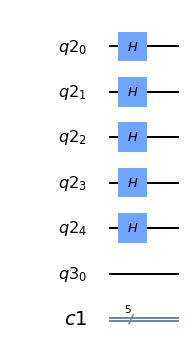

In [12]:
circ.h(node)
circ.draw(output = 'mpl')

### Maxcut

In [149]:
maxcut(circ, node, aux, creq,graph, angset)
circ.draw(output = 'mpl')

NameError: name 'angset' is not defined

### Simulator

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(circ, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer, figsize=(20,10))

In [16]:
obser = maxcut_observable(graph, 5)

In [17]:
average_data(answer, obser)

3.4169921875

### Main

In [12]:
graph = [[0,1],[1,2],[1,4],[2,3],[3,4],[4,5],[5,0]]
ang1 = np.array([10,20,30])
ang2 = np.array([30,20,10])
ang_zip = zip(ang1,ang2)

In [224]:
n = 6
node = QuantumRegister(n)
aux = QuantumRegister(1)
creq = ClassicalRegister(n)
circ = QuantumCircuit(node,aux,creq)
circ.h(node)

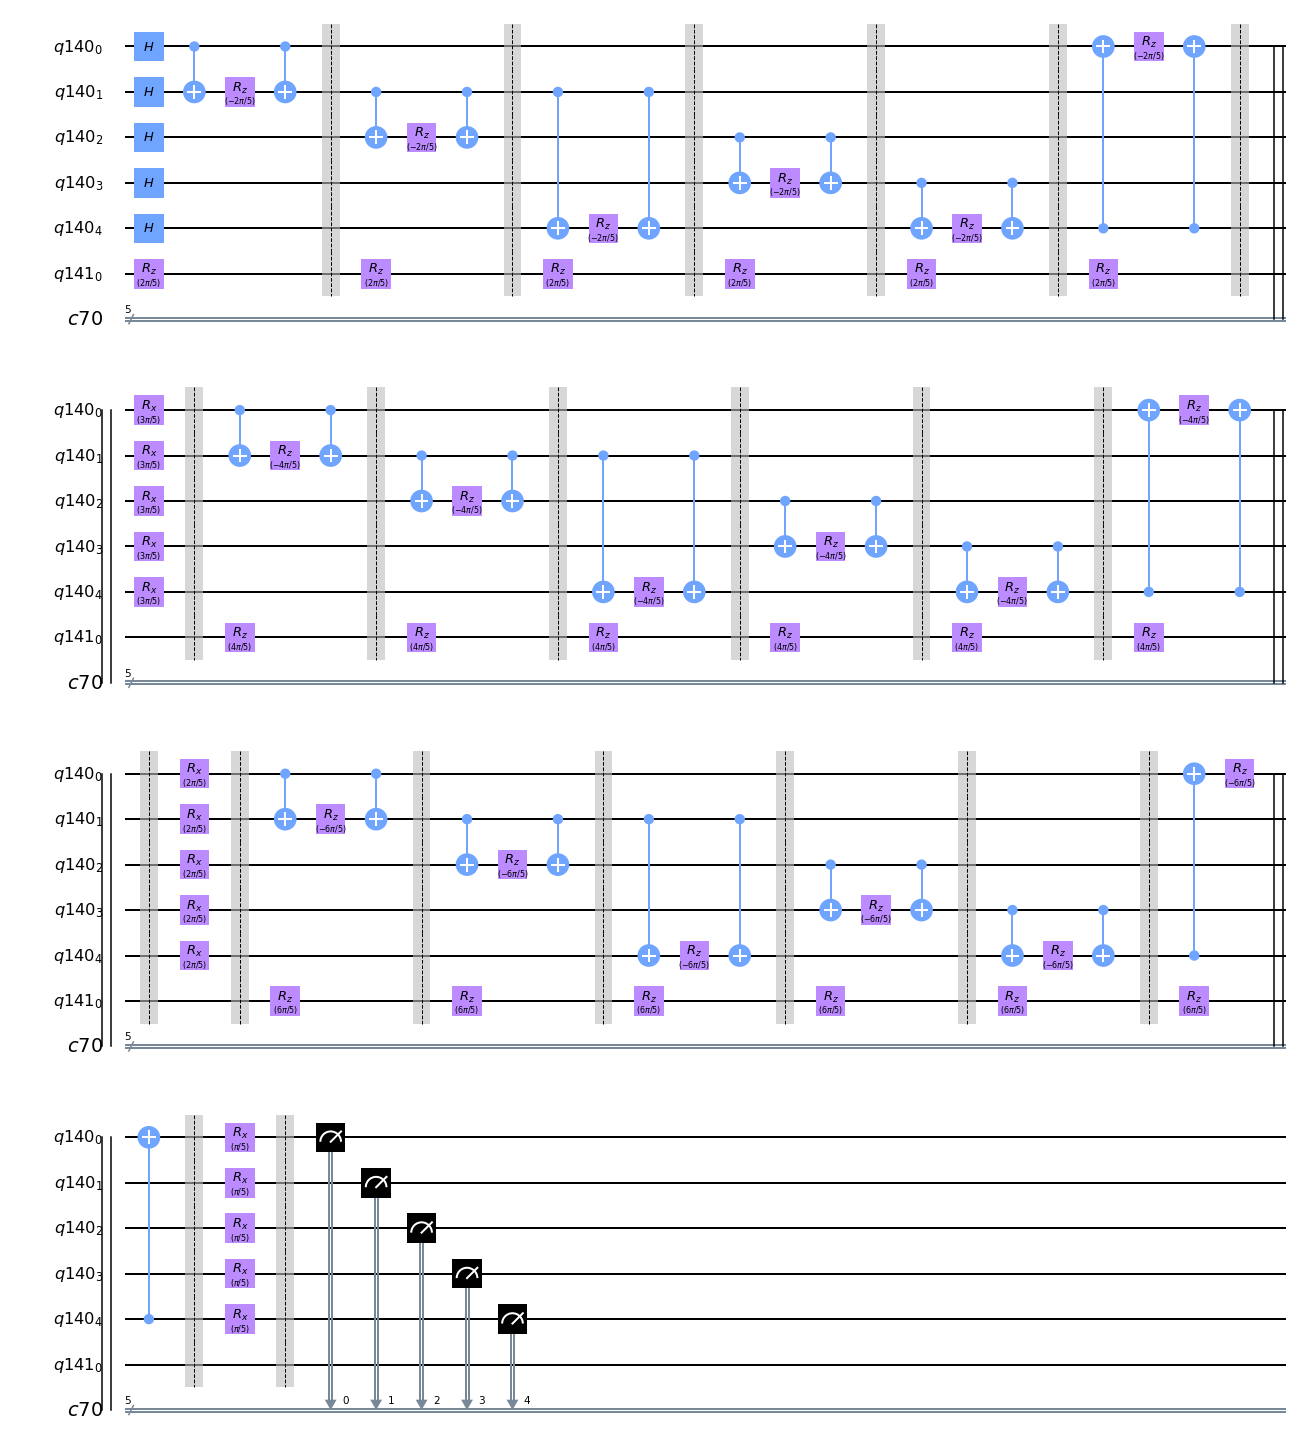

In [225]:
maxcut(circ, node, aux, creq,graph, ang_zip)
circ.draw(output='mpl')

No measurements in circuit "circuit0", classical register will remain all zeros.


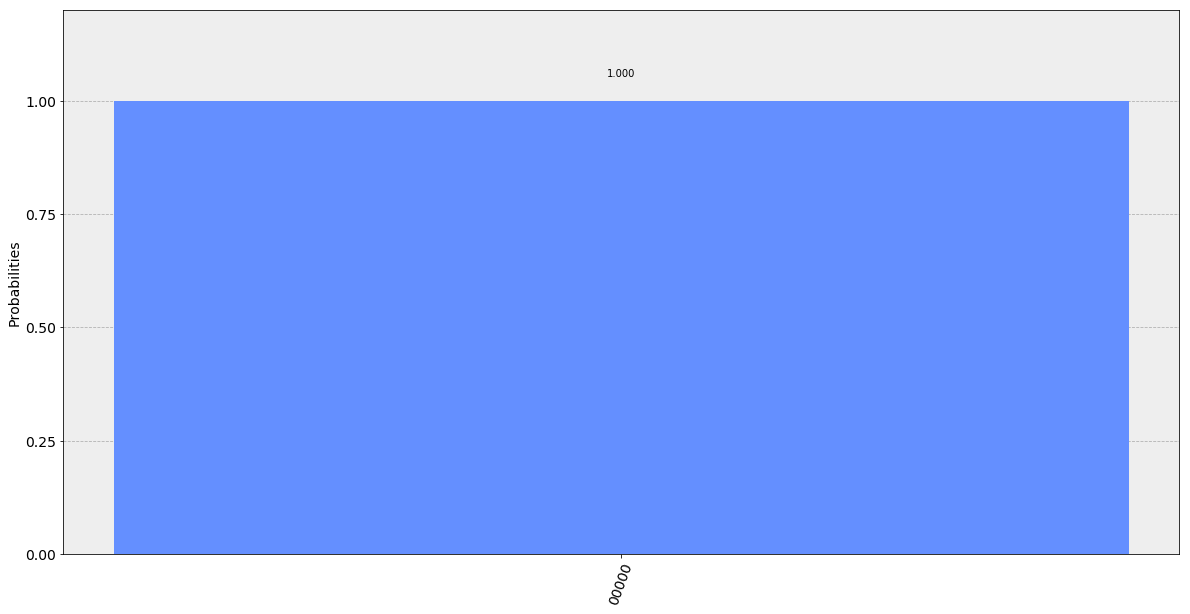

In [94]:
results = execute(circ, backend = backend, shots = shots).result()
answer = results.get_counts()
plot_histogram(answer, figsize=(20,10))

In [15]:
p = 2
n = 5
graph = [[0,1],[1,4],[1,2],[2,3],[3,4],[4,0]]
seed1 = [random.randint(0,100) for i in range(p)]
seed2 = [random.randint(0,100) for i in range(p)]
ang1 = seed1
ang2 = seed2


In [12]:
def gradient(n,graph,ang1,ang2,step_len=1):
    ang1_dif = []
    ang2_dif = []
    res = outcome(n,graph,ang1,ang2)
    for i in range(len(ang1)):
        angp = ang1.copy()
        angp[i] += step_len
        resp = (outcome(n,graph,angp,ang2)-res)/step_len
        ang1_dif = np.append(ang1_dif,resp)
    
    for i in range(len(ang2)):
        angp = ang2.copy()
        angp[i] += step_len
        resp = (outcome(n,graph,ang1,angp)-res)/step_len
        ang2_dif = np.append(ang2_dif,resp)
    
    return(np.vstack((ang1_dif,ang2_dif)))

In [42]:
def gra_desc(n,graph,ang1,ang2,step_size=1):
    iter_num = 100
    threshold = 0.01
    t = 0
    s = step_size
    x0 = np.vstack((ang1,ang2))
    gra0 = gradient(n,graph,x0[0],x0[1])
    x1 = x0 + s * gra0
    gra1 = gradient(n,graph,x1[0],x1[1])
    f1 = outcome(n,graph,x1[0],x1[1])
    times = 0
    for i in range(iter_num):
        del_x = np.hstack(x1 - x0)
        del_df = np.hstack(gra1 - gra0)
        s = abs(np.dot(del_x,del_df)/(np.dot(del_df,del_df))) 
        x2 = x1 + s * gra1
        f2 = outcome(n,graph,x2[0],x2[1])   
        gra2 = gradient(n,graph,x2[0],x2[1])
        times += 1
        print(x2,f2)
        if(abs(f2-f1) < threshold):            
            print('ok')
            return(x2,f2)
        while(f1 > f2 and t < 10):
            t = t + 1
            s = s * 0.5
            x2 = x1 + s * gra1
            f2 = outcome(n,graph,x2[0],x2[1])
        x0 = x1
        gra0 = gra1
        gra1 = gra2
        x1 = x2
        f1 = f2
    return(x1,f1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[3.094990949909499, 2.8800388003880038, 2.660526605266053, 2.4465944659446595, 2.248422484224842, 2.0973009730097303, 2.012340123401234, 2.005390053900539, 2.084450844508445, 2.2314123141231414, 2.4205342053420535, 2.6661866618666186, 2.887378873788738, 3.112511125111251, 3.294082940829408, 3.4203042030420305, 3.4973149731497313, 3.5326853268532687, 3.5094650946509467, 3.4520745207452075, 3.3947539475394755, 3.3117531175311754, 3.2505725057250574, 3.203862038620386, 3.1641916419164193, 3.130891308913089, 3.1012810128101282, 3.085790857908579, 3.074170741707417, 3.052920529205292, 3.032330323303233, 3.0136001360013602, 2.993759937599376, 2.968359683596836, 2.9619996199961998, 2.94581945

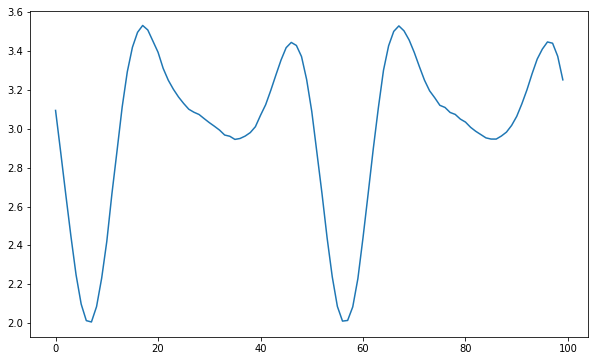

In [80]:
graph = [[0,1],[1,4],[1,2],[2,3],[3,4],[4,0]]
n = 5
np = 100
x = array([i for i in range(np)])
f = [outcome(n,graph,[i,65],[15,24]) for i in range(np)]
print(x)
print(f)
plt.figure(figsize=(10,6))
plt.plot(x,f)

## Gradient descend

In [28]:
#graph = [[0,1],[1,2],[2,3],[3,0]]
graph = [[0,1],[1,2],[1,4],[2,3],[3,4],[4,0]]

In [71]:
n=5

def init_localmax():
    ang1 = [random.randint(0,100)]
    ang2 = [random.randint(0,100)]
    res = gra_desc(n,graph,ang1,ang2)
    opti_ang = res[0]
    return(opti_ang) 

In [75]:
p = 1
print('p = %d' % p)
opti_ang = init_localmin()
while(p < 8): 
    p = p + 1
    print('p = %d' % p)
    opti_ang1 = opti_ang[0]
    opti_ang2 = opti_ang[1]
    start_ang1 = np.zeros(p)
    start_ang2 = np.zeros(p)
    for i in range(p):
        if i == 0: 
            start_ang1[i] = opti_ang1[0]
            start_ang2[i] = opti_ang2[0]
        if i == p-1:
            start_ang1[i] = opti_ang1[p-2]
            start_ang2[i] = opti_ang2[p-2]
        else:
            start_ang1[i] = (i/(p-1))*opti_ang1[i-1] + ((p-i-1)/(p-1))*opti_ang1[i]
            start_ang2[i] = (i/(p-1))*opti_ang2[i-1] + ((p-i-1)/(p-1))*opti_ang2[i]

    res = gra_desc(n,graph,start_ang1,start_ang2)
    opti_ang = res[0]
    opti_val = res[1]
print('done')
print(res)

p = 1
[[ 4.63390333]
 [54.7000325 ]] 3.8774787747877477
[[ 4.83668569]
 [55.13376143]] 3.908789087890879
[[ 4.77516741]
 [55.09314171]] 3.902769027690277
ok
p = 2
[[ 4.52218542  4.9786268 ]
 [55.12825852 54.7520295 ]] 3.998649986499865
[[ 3.20066141  6.09542385]
 [55.41973976 52.92805362]] 4.129531295312953
[[ 3.50015167  6.11368036]
 [55.83099883 53.18239039]] 4.164631646316463
[[ 3.408828    6.28431738]
 [56.08264879 53.19564705]] 4.17420174201742
ok
p = 3
[[ 3.33437722  4.82259769  6.30881379]
 [56.11985659 54.56909431 53.18040979]] 4.385943859438594
ok
p = 4
[[ 3.0121407   4.25975242  5.28271781  6.3055437 ]
 [56.1415771  54.9083309  53.98973687 52.94528547]] 4.403584035840359
[[ 2.13061289  3.99613597  5.13529956  6.25380261]
 [56.21392692 54.41977227 53.62851393 52.26353088]] 4.432754327543275
[[ 2.08773467  3.70907155  4.95060808  6.18475817]
 [56.22748752 54.4052567  53.51258039 52.15762455]] 4.42489424894249
ok
p = 5
[[ 1.56689103  3.05377204  4.33027254  5.03713988  6.2400858

In [36]:
p = 2
n = 5
graph = [[0,1],[1,2],[1,4],[2,3],[3,4],[4,0]]
seed1 = [random.randint(0,100) for i in range(p)]
seed2 = [random.randint(0,100) for i in range(p)]
ang1 = seed1
ang2 = seed2
ang1_dif = []
ang2_dif = []
step_len = 1
for i in range(len(ang1)):
    angp = ang1[:]
    angp[i] += step_len
    ang1_dif.append((outcome(n,graph,angp,ang2)-outcome(n,graph,ang1,ang2))/step_len)
for i in range(len(ang2)):
    angp = ang2[:]
    angp[i] += step_len
    ang2_dif.append((outcome(n,graph,ang1,angp)-outcome(n,graph,ang1,ang2))/step_len)
[ang1_dif,ang2_dif]

[[0.10931093109310908, 0.0506050605060504],
 [-0.1373137313731374, 0.041104110411041006]]

In [42]:
for i in range(10):
    s = 1
    x1 = np.array([ang1,ang2])
    gra = np.array([ang1_dif,ang2_dif]) 
    x2 = x1 + s * np.array(gra)
    f1 = outcome(n,graph,x1[0],x1[1])
    f2 = outcome(n,graph,x2[0],x2[1])
    print(x1,x2)
    print(f1,f2,f2-f1)

[[52 38]
 [33 48]] [[52.10931093 38.05060506]
 [32.86268627 48.04110411]]
3.451245124512451 3.492349234923492 0.041104110411041006
[[52 38]
 [33 48]] [[52.10931093 38.05060506]
 [32.86268627 48.04110411]]
3.4663466346634664 3.5214521452145213 0.05510551055105495
[[52 38]
 [33 48]] [[52.10931093 38.05060506]
 [32.86268627 48.04110411]]
3.4563456345634562 3.4951495149514953 0.03880388038803906
[[52 38]
 [33 48]] [[52.10931093 38.05060506]
 [32.86268627 48.04110411]]
3.4425442544254428 3.4656465646564656 0.023102310231022827
[[52 38]
 [33 48]] [[52.10931093 38.05060506]
 [32.86268627 48.04110411]]
3.4643464346434643 3.499049904990499 0.03470347034703458
[[52 38]
 [33 48]] [[52.10931093 38.05060506]
 [32.86268627 48.04110411]]
3.4547454745474546 3.4908490849084908 0.036103610361036154
[[52 38]
 [33 48]] [[52.10931093 38.05060506]
 [32.86268627 48.04110411]]
3.443744374437444 3.488048804880488 0.04430443044304422
[[52 38]
 [33 48]] [[52.10931093 38.05060506]
 [32.86268627 48.04110411]]
3.45

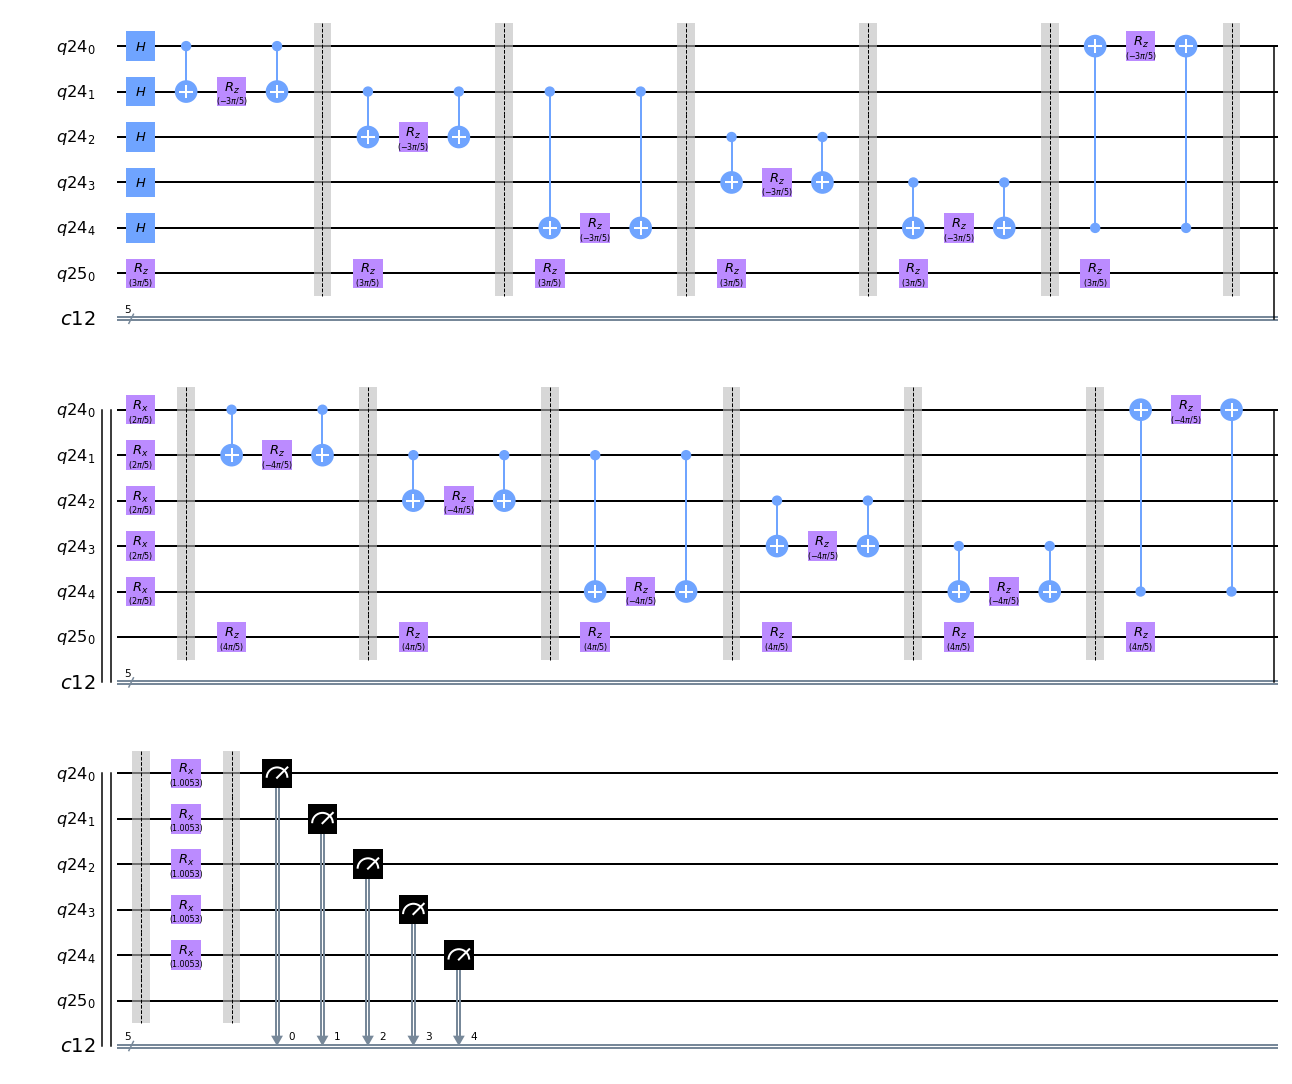

In [143]:
circ.draw(output='mpl')

In [20]:
def find_optimal(n, graph, resol):
    obser = maxcut_observable(graph, n)
    angspace = []
    ang1 = np.linspace(0,1,resol)*pi
    ang2 = np.linspace(0,1,resol)*pi
    for i in ang1:
        for j in ang2:
            angspace.append([i,j])
    res_list = []
    for angset in angspace:
        node = QuantumRegister(n)
        aux = QuantumRegister(1)
        creq = ClassicalRegister(n)
        circ = QuantumCircuit(node,aux,creq)
        circ.h(node)
        maxcut(circ, node, aux, creq,graph, [angset])
        results = execute(circ, backend = backend, shots = shots).result()
        answer = results.get_counts()
        average = average_data(answer, obser)
        res_list.append(average)   
    return(res_list)

In [40]:
p = 2

ang1 = [0,50]
ang2 = [100,70]

ang11 = array(ang1)*0.01*pi
ang22 = array(ang2)*0.01*pi
ang_zip = zip(ang11,ang22)

for a,b in ang_zip:
    node = QuantumRegister(n)
    aux = QuantumRegister(1)
    creq = ClassicalRegister(n)
    circ = QuantumCircuit(node,aux,creq)
    circ.h(node)
    maxcut(circ, node, aux, creq,graph, [angset])
    results = execute(circ, backend = backend, shots = shots).result()
    answer = results.get_counts()
    average = average_data(answer, obser)

0.0 3.141592653589793 0
1.5707963267948966 2.199114857512855 0
